In [2]:
from scipy.linalg import circulant
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cvxpy as cvx

In [3]:
source_path = 'Data01.mat'
mat = scipy.io.loadmat(source_path)

In [4]:
t = mat['t']
y = mat['y']
N = y.shape[0]

$ \texttt{Minimize } ||{\tilde{y}} - v||_1$

$\texttt{Subject to } ||Dv||_1 \le q$


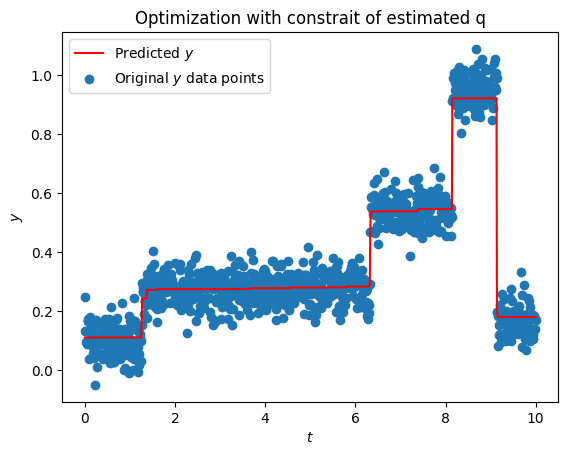

In [5]:
y_pred = cvx.Variable((N,1))
q = 1.55
c1 = cvx.norm1(y_pred[1:] - y_pred[0:-1]) <= q

diff = cvx.Minimize(cvx.power(cvx.norm2(y_pred - y), 2))
problem = cvx.Problem(diff, [c1])
problem.solve(solver="ECOS")
plt.plot(t, y_pred.value, c='r', label='Predicted $y$')
plt.title("Optimization with constrain of estimated q")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.scatter(t, y, label='Original $y$ data points')
plt.legend()
plt.show()

$ \texttt{Minimize } ||{\tilde{y}} - v||_1 + \tau||Dv||_1$


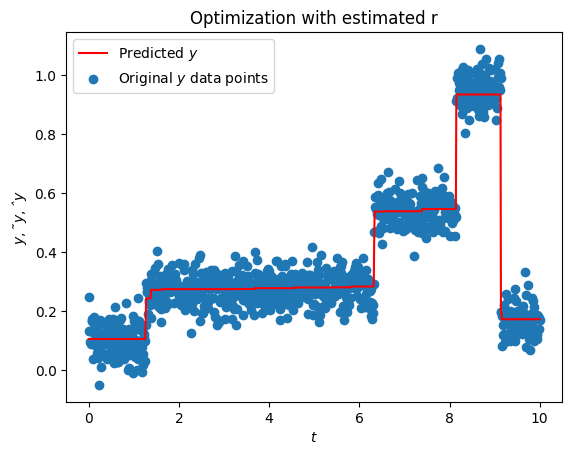

In [7]:
y_pred = cvx.Variable((N,1))
r = 1.55

diff = cvx.Minimize(cvx.power(cvx.norm2(y_pred - y), 2) + cvx.norm1(y_pred[1:] - y_pred[0:-1]) * r)
problem = cvx.Problem(diff, [])
problem.solve(solver="ECOS")
plt.plot(t, y_pred.value, c='r', label='Predicted $y$')
plt.title("Optimization with estimated r")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.scatter(t, y, label='Original $y$ data points')
plt.legend()
plt.show()

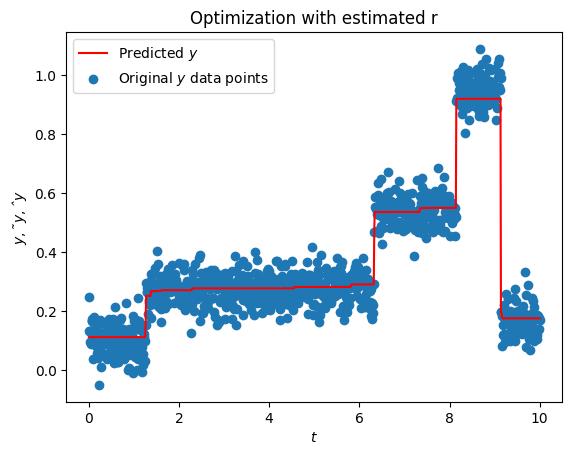

In [8]:
t = mat['t']
y = mat['y']
N = y.shape[0]

first_row = np.zeros(N)
first_row[0] = -1
first_row[1] = 1
D = circulant(first_row).transpose()[:-1]

A = np.block([
    [np.identity(N), -np.identity(N), np.zeros((N, (N-1)))],
     [-np.identity(N), -np.identity(N), np.zeros((N, (N-1)))],
     [np.zeros((1, N)), np.zeros((1, N)), np.ones((N-1))],
     [-D, np.zeros(((N-1), N)), -np.identity((N-1))],
     [D, np.zeros(((N-1), N)), -np.identity((N-1))]
])

c = np.block([
    [np.zeros((N, 1))],
    [np.ones((N, 1))],
    [np.zeros((N-1, 1))]
])

b = np.block([
    [np.array(y).reshape(-1, 1)],
    [-np.array(y).reshape(-1, 1)],
    [np.array(q).reshape(-1, 1)],
    [np.zeros((N - 1, 1))],
    [np.zeros((N - 1, 1))]
])

y_pred = cvx.Variable((N, 1))
xi = cvx.Variable((N, 1))
delta = cvx.Variable((N-1, 1))
x = cvx.vstack((y_pred, xi, delta))

diff = cvx.Minimize(c.transpose()@x)
problem = cvx.Problem(diff, [A@x <= b])
problem.solve(solver="ECOS")

plt.plot(t, y_pred.value, c='r', label='Predicted $y$')
plt.title("Optimization with estimated r")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.scatter(t, y, label='Original $y$ data points')
plt.legend()
plt.show()